In [4]:
import sys
sys.path.append('..') #workaround to deal with directory issues in notebooks

import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np
from sklearn.manifold import TSNE
from sklearn.decomposition import PCA
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis 

from src.features import load_features

In [5]:
# import variables
data_dir='../data/'
class_labels,two_class_labels,pos_str,neg_str,clus_co,ar_array,num_regions,num_subjs=load_features(data_dir)

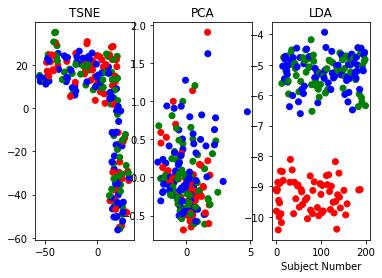

In [8]:
auto_embedded_tsne=TSNE(n_components=2,perplexity=5).fit_transform(ar_array.transpose()) #tried various perplexities (5,10,15,30,50,100) at perplexities higher than 5 the points seem linearly correlated with no class distinctions and at high perplexities (100) the points seem randomly distributed. 
auto_embedded_pca=PCA(n_components=2).fit_transform(ar_array.transpose())

LDA=LinearDiscriminantAnalysis(solver='eigen',shrinkage='auto')
auto_embedded_lda=LDA.fit_transform(ar_array.transpose(),two_class_labels) #will automatically produce one dimensional output because n_classes=2

colormap = np.array(['r', 'g','b'])
plt.subplot(1,3,1)
plt.scatter(auto_embedded_tsne[:,0],auto_embedded_tsne[:,1],c=colormap[class_labels-1])
plt.title("TSNE")
plt.subplot(1,3,2)
plt.scatter(auto_embedded_pca[:,0],auto_embedded_pca[:,1],c=colormap[class_labels-1])
plt.title("PCA")
plt.subplot(1,3,3)
plt.scatter([val for val in range(len(auto_embedded_lda))],auto_embedded_lda,c=colormap[class_labels-1])
plt.title("LDA")
plt.xlabel('Subject Number')
plt.show()